In [1]:
import cartopy.crs as ccrs
import cartopy
from cartopy import feature as cf
import xarray as xr
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import metpy

In [2]:
import metpy.calc as mpcals
from metpy.units import units

In [3]:
single_level= xr.open_dataset("SingleLevel.nc")
multi_level= xr.open_dataset("MultiLevel.nc")

In [16]:
single_level

<xarray.Dataset>
Dimensions:    (longitude: 149, latitude: 133, time: 72)
Coordinates:
  * longitude  (longitude) float32 -18.0 -17.75 -17.5 -17.25 ... 18.5 18.75 19.0
  * latitude   (latitude) float32 78.0 77.75 77.5 77.25 ... 45.5 45.25 45.0
  * time       (time) datetime64[ns] 2022-01-28 ... 2022-01-30T23:00:00
Data variables: (12/13)
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    cbh        (time, latitude, longitude) float32 ...
    cape       (time, latitude, longitude) float32 ...
    ...         ...
    msl        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    tclw       (time, latitude, longitude) float32 ...
    tcrw       (time, latitude, longitude) float32 ...
    totalx     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-10 12:38:43 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [5]:
multi_level['mix_ratio_850'] = mpcals.mixing_ratio_from_relative_humidity(850* units.hPa, multi_level.t[:,3,:,:], multi_level.r[:,3,:,:])

In [6]:
multi_level

<xarray.Dataset>
Dimensions:        (longitude: 149, latitude: 133, level: 5, time: 72)
Coordinates:
  * longitude      (longitude) float32 -18.0 -17.75 -17.5 ... 18.5 18.75 19.0
  * latitude       (latitude) float32 78.0 77.75 77.5 77.25 ... 45.5 45.25 45.0
  * level          (level) int32 200 500 700 850 1000
  * time           (time) datetime64[ns] 2022-01-28 ... 2022-01-30T23:00:00
Data variables: (12/13)
    cc             (time, level, latitude, longitude) float32 ...
    z              (time, level, latitude, longitude) float32 ...
    r              (time, level, latitude, longitude) float32 ...
    ciwc           (time, level, latitude, longitude) float32 ...
    clwc           (time, level, latitude, longitude) float32 ...
    q              (time, level, latitude, longitude) float32 ...
    ...             ...
    t              (time, level, latitude, longitude) float32 ...
    u              (time, level, latitude, longitude) float32 ...
    v              (time, level, latitude, longitude) float32 ...
    w              (time, level, latitude, longitude) float32 ...
    vo             (time, level, latitude, longitude) float32 ...
    mix_ratio_850  (time, latitude, longitude) float32 <Quantity([[[0.0007139...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-10 12:31:36 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
multi_level['vapour_pressure_850'] = mpcals.vapor_pressure(850* units.hPa, multi_level.mix_ratio_850[:,:,:])

In [9]:
multi_level['dew_point_850'] = mpcals.dewpoint(multi_level.vapour_pressure_850[:,:,:])

In [10]:
multi_level['temp_850'] = multi_level.t[:,3,:,:]* units.degC - 273 * units.degC
multi_level

<xarray.Dataset>
Dimensions:              (longitude: 149, latitude: 133, level: 5, time: 72)
Coordinates:
  * longitude            (longitude) float32 -18.0 -17.75 -17.5 ... 18.75 19.0
  * latitude             (latitude) float32 78.0 77.75 77.5 ... 45.5 45.25 45.0
  * level                (level) int32 200 500 700 850 1000
  * time                 (time) datetime64[ns] 2022-01-28 ... 2022-01-30T23:0...
Data variables: (12/16)
    cc                   (time, level, latitude, longitude) float32 ...
    z                    (time, level, latitude, longitude) float32 ...
    r                    (time, level, latitude, longitude) float32 ...
    ciwc                 (time, level, latitude, longitude) float32 ...
    clwc                 (time, level, latitude, longitude) float32 ...
    q                    (time, level, latitude, longitude) float32 ...
    ...                   ...
    w                    (time, level, latitude, longitude) float32 ...
    vo                   (time, level, latitude, longitude) float32 ...
    mix_ratio_850        (time, latitude, longitude) float32 <Quantity([[[0.0...
    vapour_pressure_850  (time, latitude, longitude) float32 <Quantity([[[0.9...
    dew_point_850        (time, latitude, longitude) float32 <Quantity([[[-22...
    temp_850             (time, latitude, longitude) float32 <Quantity([[[-21...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-10 12:31:36 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [11]:
multi_level['temp_500'] = multi_level.t[:,1,:,:]* units.degC - 273 * units.degC
multi_level

<xarray.Dataset>
Dimensions:              (longitude: 149, latitude: 133, level: 5, time: 72)
Coordinates:
  * longitude            (longitude) float32 -18.0 -17.75 -17.5 ... 18.75 19.0
  * latitude             (latitude) float32 78.0 77.75 77.5 ... 45.5 45.25 45.0
  * level                (level) int32 200 500 700 850 1000
  * time                 (time) datetime64[ns] 2022-01-28 ... 2022-01-30T23:0...
Data variables: (12/17)
    cc                   (time, level, latitude, longitude) float32 ...
    z                    (time, level, latitude, longitude) float32 ...
    r                    (time, level, latitude, longitude) float32 ...
    ciwc                 (time, level, latitude, longitude) float32 ...
    clwc                 (time, level, latitude, longitude) float32 ...
    q                    (time, level, latitude, longitude) float32 ...
    ...                   ...
    vo                   (time, level, latitude, longitude) float32 ...
    mix_ratio_850        (time, latitude, longitude) float32 <Quantity([[[0.0...
    vapour_pressure_850  (time, latitude, longitude) float32 <Quantity([[[0.9...
    dew_point_850        (time, latitude, longitude) float32 <Quantity([[[-22...
    temp_850             (time, latitude, longitude) float32 <Quantity([[[-21...
    temp_500             (time, latitude, longitude) float32 <Quantity([[[-40...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-10 12:31:36 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [12]:
multi_level['tt_index'] = (multi_level.temp_850 + multi_level.dew_point_850) - (2* multi_level.temp_500)

In [13]:
multi_level['tt_index_TT'] = multi_level.tt_index * units.kelvin

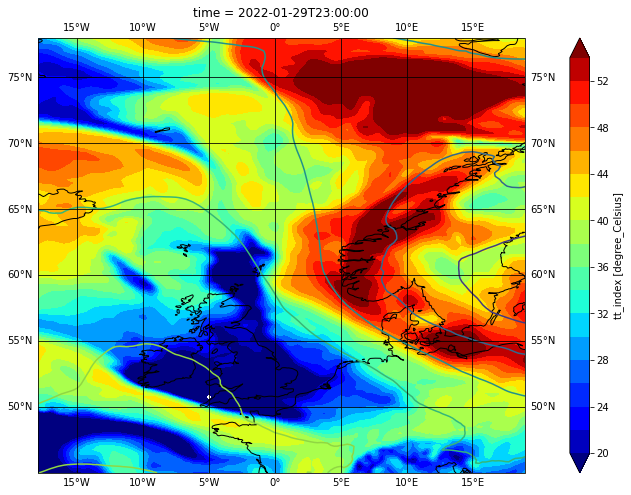

In [14]:
for i in range(24,48):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16, 8))
    #plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, color='black')
    single_level.msl[i,:,:].plot.contour()
    multi_level.tt_index[i,:,:].plot.contourf(levels=np.arange(20, 55, 2),cmap='jet')
    plt.savefig(f'tt{i}.png')

In [17]:
single_level

<xarray.Dataset>
Dimensions:    (longitude: 81, latitude: 61, time: 72)
Coordinates:
  * longitude  (longitude) float32 -135.0 -134.8 -134.5 ... -115.5 -115.2 -115.0
  * latitude   (latitude) float32 25.0 24.75 24.5 24.25 ... 10.5 10.25 10.0
  * time       (time) datetime64[ns] 2022-07-10 ... 2022-07-12T23:00:00
Data variables: (12/13)
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
    d2m        (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    cbh        (time, latitude, longitude) float32 ...
    cape       (time, latitude, longitude) float32 ...
    ...         ...
    msl        (time, latitude, longitude) float32 ...
    sst        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    tclw       (time, latitude, longitude) float32 ...
    tcrw       (time, latitude, longitude) float32 ...
    totalx     (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-12-07 18:43:04 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [ ]:
for i in range(24,48):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16, 8))
    #plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, color='black')
    single_level.totalx[i,:,:].plot.contourf(levels=np.arange(20, 55, 2),cmap='jet')
    plt.savefig(f'rtt{i}.png')

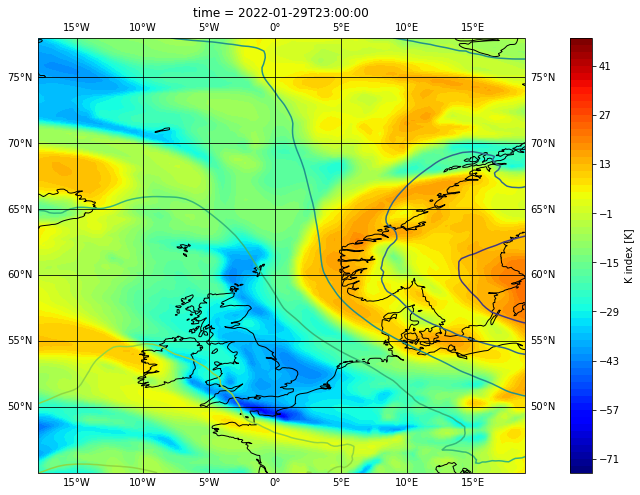

In [21]:
for i in range(24,48):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16, 8))
    #plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels=True, color='black')
    single_level.msl[i,:,:].plot.contour()
    single_level.kx[i,:,:].plot.contourf(levels=np.arange(-75, 50, 2),cmap='jet')
    plt.savefig(f'kx{i}.png')